### Try it 10.1: Decomposing Time Series


<center>
    <img src = 'images/spots.png' /><img src = 'images/air.png' />
</center>


 

This activity fouses on exploring two different time series and the decomposed elements.  The example of sunspots data is given as well as a dataset containing air passenger information through the twentieth century in the United States.  These are both time series datasets however there is a distinct difference in the nature of the time series.  

Below, you are to use the statsmodels function `seasonal_decompose` to show how the trend and seasonality of the series differ in (perhaps) expected ways.  To begin, you are to make sure the datasets contain an appropriate time stamp index -- statsmodels expects this.  Then, use the `seasonal_decompose` function to decompose the series into trend and seasonality.  Examing plots of these elements, and discuss the similarities and differences between these components for the two time series.  

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
from scipy.signal import argrelextrema

In [101]:
def plot_components_sunspots(df):
    f, axl = plt.subplots(4, 1, figsize=(9,6), sharex=True, height_ratios = [1, 1, 1, 3])

    for ax in axl:
        ax.grid()
        ax.xaxis.set_major_locator(mdates.YearLocator(base=22))

    f.suptitle('Sunspots')

    ax = axl[0]
    ax.set_ylabel('Trend')
    ax.plot(df.trend, label = 'trend')

    ax = axl[1]
    ax.set_ylabel('Seasonal')
    ax.plot(df.seasonal, label = 'seasonal')

    ax = axl[2]
    ax.set_ylabel('Residuals')
    ax.plot(df.resid, label = 'residuals')

    ax = axl[3]
    ax.set_ylabel('Original data')
    ax.plot(df.observed, c='k', label = 'original')
    ax.plot(df.trend, c = 'r', label = 'trend')

    ax.legend()

    ax.set_xlim([df.observed.index.min(), df.observed.index.max()])

    f.gca().set_xlabel('Year')

    f.tight_layout()
    f.show()

1.20498982978598


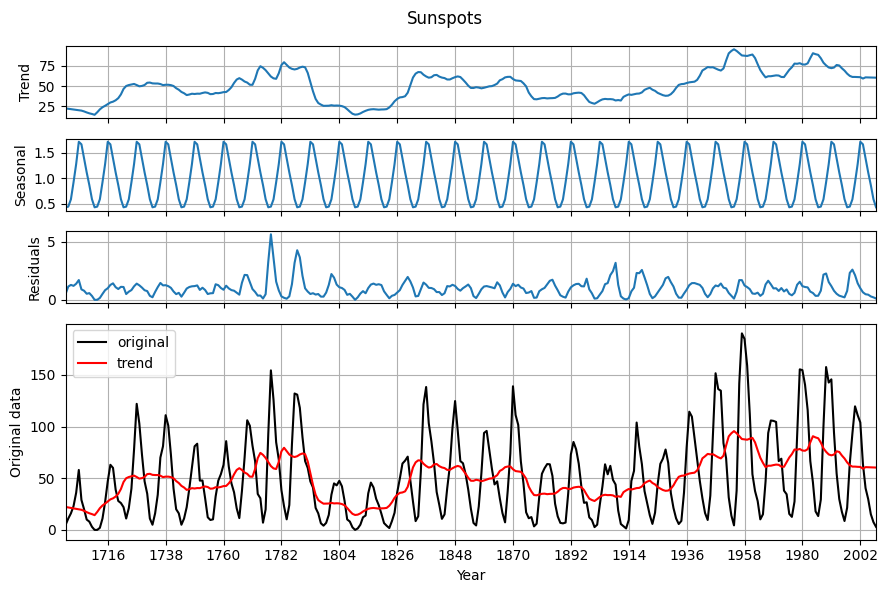

In [125]:
sunspots = sm.datasets.sunspots.load_pandas().data
df_sunspots = sunspots.copy()
df_sunspots.index = pd.to_datetime([int(i) for i in df_sunspots['YEAR']], format = '%Y')
df_sunspots.drop('YEAR', axis=1, inplace=True)
df_sunspots.columns = ['values']
df_sunspots['values'] += 1e-6

decomposed_sunspots = seasonal_decompose(df_sunspots, model = 'mult', period = 11, extrapolate_trend=True)
plot_components_sunspots(decomposed_sunspots)

RMSE = np.sqrt(np.square(decomposed_sunspots.resid.values).mean())
print(RMSE)

In [11]:
air = pd.read_csv('data/AirPassengers.csv')
air = air.set_index(pd.to_datetime(air['Month'], format='%Y-%m')).drop('Month', axis=1)
air.columns = ['values']

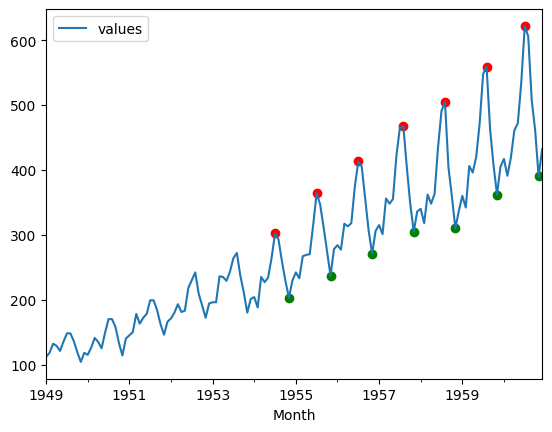

In [118]:
air.plot()
maxima_idxs = argrelextrema(air['values'].values, np.greater_equal, order=9)[0]
maxima = air.iloc[maxima_idxs, :]
minima_idxs = argrelextrema(air['values'].values, np.less_equal, order=8)[0]
minima = air.iloc[minima_idxs, :]
plt.scatter(maxima.index[-7:], maxima.values[-7:], c='r')
plt.scatter(minima.index[-7:], minima.values[-7:], c='g')
plt.show()

In [119]:
minima

,values
Month,
1949-01-01,112
1949-11-01,104
1950-11-01,114
1951-11-01,146
1952-11-01,172
1953-11-01,180
1954-11-01,203
1955-11-01,237
1956-11-01,271


In [45]:
np.diff(maxima_idxs)

array([ 1, 23,  1, 12, 12, 11, 12, 12, 13, 12, 12, 11])

In [111]:
def plot_components_air(df):
    f, axl = plt.subplots(4, 1, figsize=(9,6), sharex=True, height_ratios=[1,1,1,3])

    for ax in axl:
        ax.grid()
        ax.xaxis.set_major_locator(mdates.MonthLocator(interval=12))

    f.suptitle('Air passengers')
    
    ax = axl[0]
    ax.set_ylabel('Trend')
    ax.plot(df.trend, label = 'trend')

    ax = axl[1]
    ax.set_ylabel('Seasonal')
    ax.plot(df.seasonal, label = 'seasonal')

    ax = axl[2]
    ax.set_ylabel('Residuals')
    ax.plot(df.resid, label = 'residuals')


    ax = axl[3]
    ax.set_ylabel('Original data')
    ax.plot(df.observed, c='k', label = 'original')
    ax.plot(df.trend, c = 'r', label = 'trend')
    ax.scatter(maxima.index[-7:], maxima.values[-7:], c='g', label='maxima', zorder=2)

    ax.legend()


    ax.set_xlim([df.observed.index.min(), df.observed.index.max()])

    f.gca().set_xlabel('Year')

    f.tight_layout()
    f.show()

1.0000815728335506


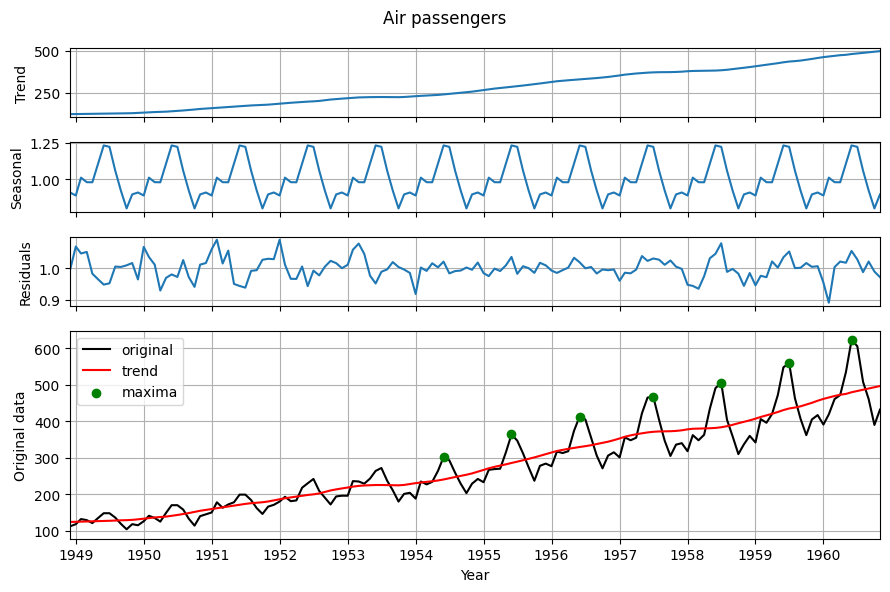

In [114]:
decomposed_air = seasonal_decompose(air, model = 'mult', period = 12, extrapolate_trend=True)
plot_components_air(decomposed_air)
RMSE = np.sqrt(np.square(decomposed_air.resid.values).mean())
print(RMSE)

In [121]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf

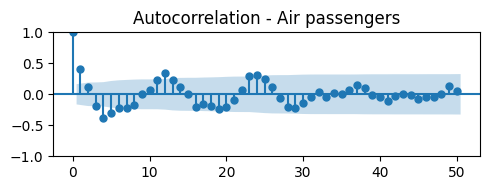

In [142]:
f, ax = plt.subplots(figsize=(5,2))
plot_acf(decomposed_air.resid, lags=50, fft=True, ax = ax)
plt.title('Autocorrelation - Air passengers')
plt.tight_layout()
plt.savefig('10.1-air-ac.png')
plt.show()

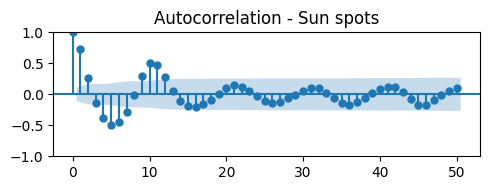

In [143]:
f, ax = plt.subplots(figsize=(5,2))
plot_acf(decomposed_sunspots.resid, lags=50, fft=True, ax = ax)
plt.title('Autocorrelation - Sun spots')
plt.tight_layout()
plt.savefig('10.1-sunspots-ac.png')
plt.show()